In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns
data = sns.load_dataset('iris')

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data.shape

(150, 5)

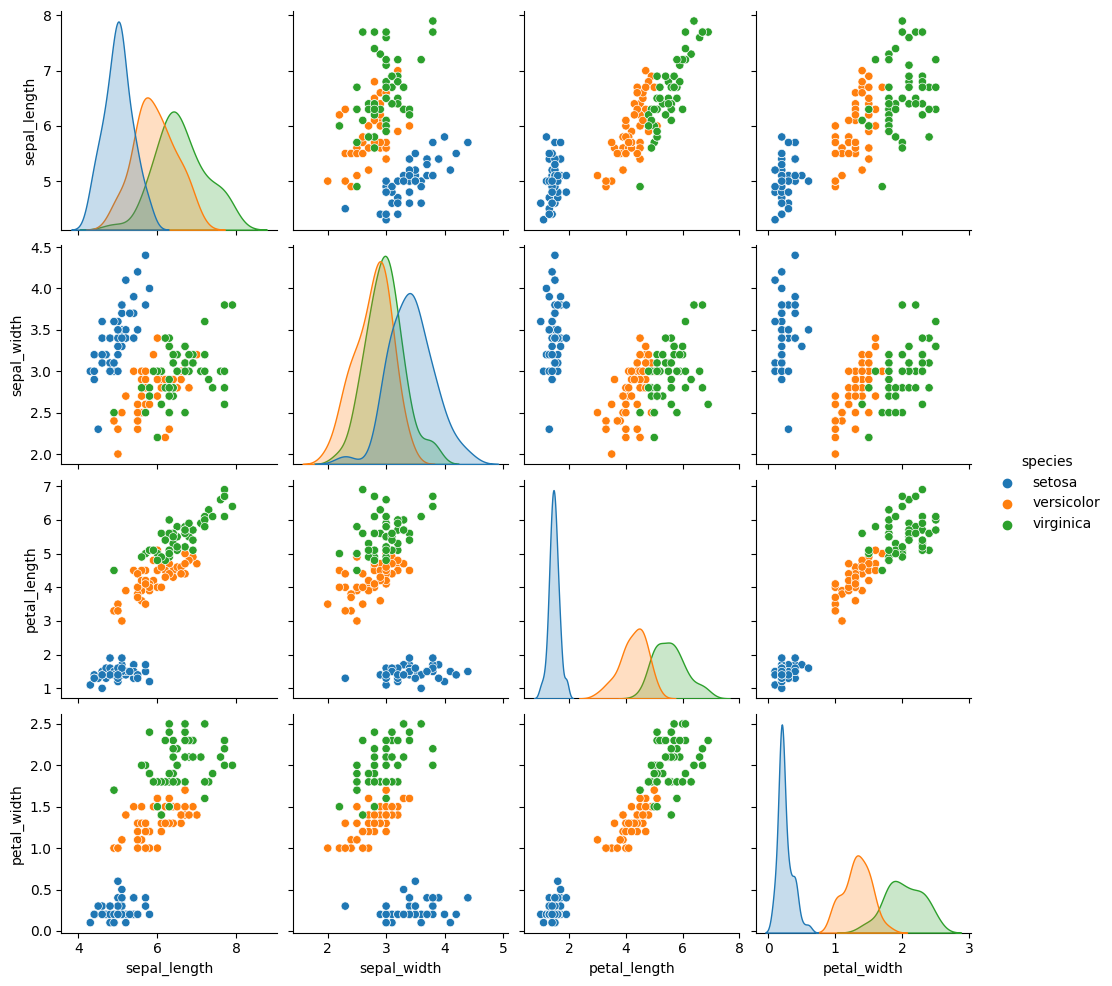

In [14]:
sns.pairplot(data, hue='species')

In [29]:
df = torch.tensor(data.drop(columns="species").values).float()
labels = torch.zeros(len(df), dtype=torch.long)
labels[data.species == 'versicolor'] = 1 
labels[data.species == 'virginica'] = 2
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


In [30]:
#  model
def model_function(learning_rate):
        model = nn.Sequential(
                nn.Linear(4,64), # input layer
                nn.ReLU(), # activation function
                nn.Linear(64,64), # hidden unit
                nn.ReLU(), # activation function
                nn.Linear(64,3), # output unit
        )
        lossfn = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        return model, lossfn, optimizer

In [55]:
model, lossfn, optimizer = model_function(0.1)

In [56]:
def train(x, y, nn, loss_function, opt, epochs):
    losses = torch.zeros(epochs)
    ongoingacc = []
    for i in range(epochs):
        # forward pass
        yhat = nn(x)

        # compute loss
        loss = loss_function(yhat, y)
        losses[i] = loss
        
        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

        # accuracy
        matches = torch.argmax(yhat, axis=1) == labels
        # the softmax gives out output for 3 labels, you want to take the maximum index of the values in each row
        # the argmax will give you the class it belongs to
        matchesnum = matches.float()
        accuracy = 100*torch.mean(matchesnum)
        ongoingacc.append(accuracy)


    # final forward pass
    preds = nn(x)
    predlabels = torch.argmax(preds, axis=1)
    totalacc = 100*torch.mean((predlabels==labels).float())
    return losses, preds, ongoingacc, totalacc

In [60]:
losses, preds, ongoingacc, totalacc = train(df, labels, model, lossfn, optimizer, 1000)

In [61]:
print(totalacc)

tensor(98.6667)


Text(0, 0.5, 'losses')

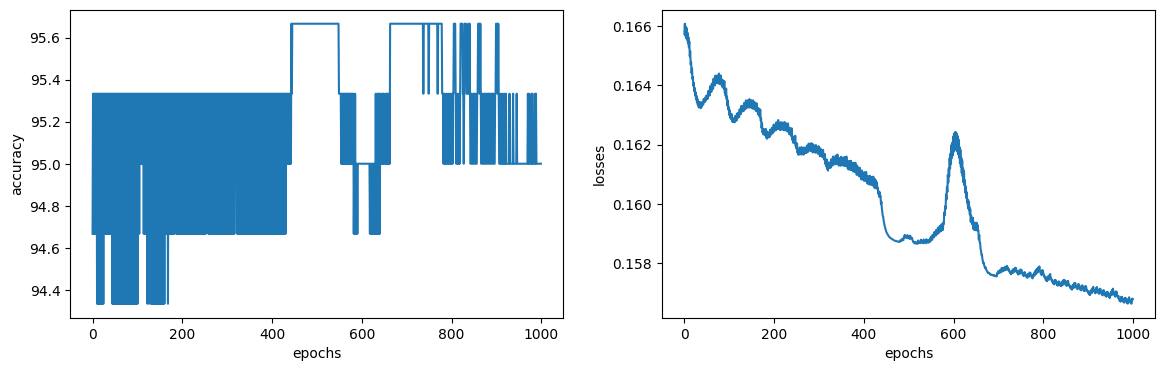

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(ongoingacc)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[1].plot(losses.detach())
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('losses')

# Code challenge

In [18]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

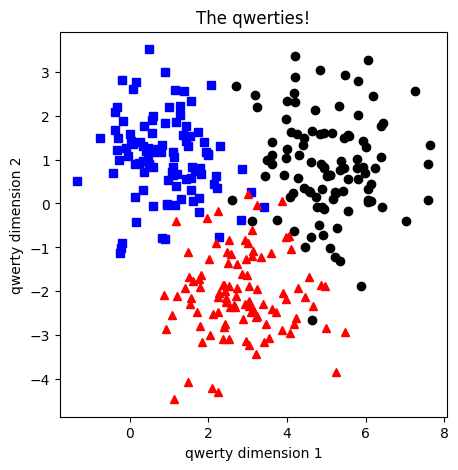

In [19]:
# create data
nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [20]:
# model
def model_function(learning_rate):
        model = nn.Sequential(
                nn.Linear(2,4), # input layer
                nn.ReLU(), # activation function
                nn.Linear(4,4), # hidden unit
                nn.ReLU(), # activation function
                nn.Linear(4,4), # hidden unit
                nn.ReLU(), # activation function
                nn.Linear(4,3), # output unit
        )
        lossfn = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        return model, lossfn, optimizer

In [21]:
model, lossfn, optimizer = model_function(0.1)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=3, bias=True)
)


In [22]:
def train(x, y, nn, loss_function, opt, epochs):
    losses = torch.zeros(epochs)
    ongoingacc = []
    for i in range(epochs):
        # forward pass
        yhat = nn(x)

        # compute loss
        loss = loss_function(yhat, y)
        losses[i] = loss
        
        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

        # accuracy
        matches = torch.argmax(yhat, axis=1) == labels
        # the softmax gives out output for 3 labels, you want to take the maximum index of the values in each row
        # the argmax will give you the class it belongs to
        matchesnum = matches.float()
        accuracy = 100*torch.mean(matchesnum)
        ongoingacc.append(accuracy)


    # final forward pass
    preds = nn(x)
    predlabels = torch.argmax(preds, axis=1)
    totalacc = 100*torch.mean((predlabels==labels).float())
    return yhat, losses, preds, ongoingacc, totalacc

In [23]:
yhat, losses, preds, ongoingacc, totalacc = train(data, labels, model, lossfn, optimizer, 10000)

In [24]:
print(totalacc)

tensor(95.3333)


Text(0, 0.5, 'losses')

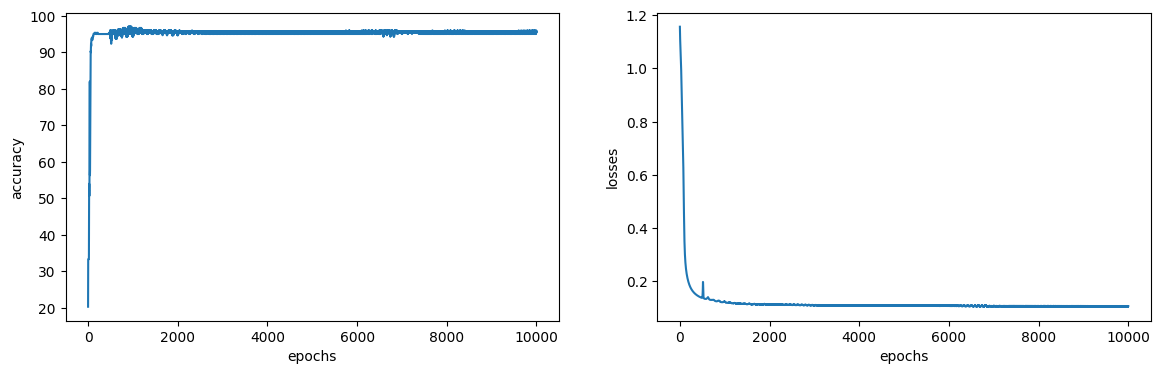

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(ongoingacc)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[1].plot(losses.detach())
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('losses')